In [5]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("delivery_time.csv")

In [2]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [8]:
data.rename(columns = {'Delivery Time':'Delivery','Sorting Time':'Sorting'}, inplace=True)

In [9]:
data.columns

Index(['Delivery', 'Sorting'], dtype='object')

In [10]:
data.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

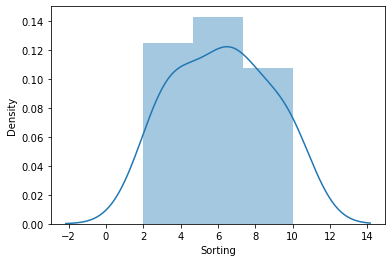

In [11]:
import seaborn as sns
sns.distplot(data['Sorting'])

<AxesSubplot:xlabel='Delivery', ylabel='Density'>

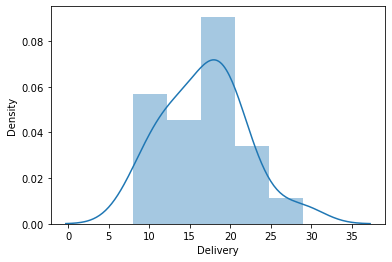

In [12]:
sns.distplot(data['Delivery'])

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("Sorting~Delivery",data=data).fit()

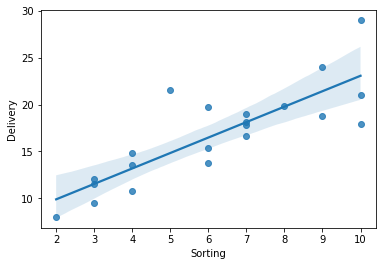

In [16]:
sns.regplot(x="Sorting", y="Delivery" , data=data);

In [17]:
model.params

Intercept   -0.756673
Delivery     0.413744
dtype: float64

In [18]:
print(model.tvalues, '\n', model.pvalues)

Intercept   -0.667290
Delivery     6.387447
dtype: float64 
 Intercept    0.512611
Delivery     0.000004
dtype: float64


In [19]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [20]:
new_data=pd.Series([4.5,5.5,6.5,7.5,8.5])

In [21]:
delivery_predict=pd.DataFrame(new_data,columns=['Delivery'])

In [22]:
model.predict(delivery_predict)

0    1.105173
1    1.518917
2    1.932660
3    2.346404
4    2.760147
dtype: float64